# Project One

### <span style = 'color : red'> In this section, i will present my update version of my project one, and highlight comments that i received.</span>


## Title: How housing features and households' income levels help to forecast housing prices?

(<span style = 'color : red'>Comment 1: The goal of the project is not completely clear. If you were trying to answer 1 explicit question about the real world, what would the question be?</span> <br> Improvement: I revise the title of the project, so my question is "how housing features and households' income levels relate with housing prices?" And in the second paragraph of <b>introduction</b>, it mentions the specific parts of housing features.)

## Introduction

(<span style = 'color : red'>Comment 2: You should not write your introduction in bullet point format.<br></span>Improvement: I moved the part where i explain the variables into <b>Reading data</b> part.)

Housing prices has became one of the primary focuses recently all over the world, people are curious about how housing prices will fluctuate as a result of changes in certain independent variables. This report aims to present the discoveries, which will throw light on the predictions about housing prices.

To be more specific, this report will reveal how housing features(<b>including housing ages, capacity of rooms and location away from the ocean</b>), households' incomes help to expect housing prices.

The data is drawn from 1990 U.S. Census about housing prices in California in 1990, the data provided the information about the location of the houses, latitudes, longitudes, housing ages, and population and households within in each block, as well as households' incomes. 

## Import libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Reading data

In [7]:
# Reading and observing the dataset.
df = pd.read_csv("housing.csv")
df = pd.DataFrame(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


There are 10 columns in the dataset, which means there are 10 attributes. 

Among all the variables, i want to focus on housing_Median_Age, avg_capacity, total_Rooms, ocean_Proximity, median_Income as my independent variables, and median_House_Value as my dependent variable. The following points introduce descriptions for all the variables.

<b>Independent variable:<b/>

- Longitude: The longitude of block .

- Latitude: The latitude of a block.

- median_house_age: median age of a house within a block. 

- total_rooms: total number of rooms within a block.

- total_bedrooms: total number of bedrooms within a block.

- population: total number of people within a block.

- households: total number of households within a block.

- median_income: median income for households within a block, measured in tens of thousands of US Dollars.

- oceanProximity: location of the house compared with ocean.

I define a new varibale called 'avg_capacity', which equals to total rooms devide the total households within a block.

- avg_capacity: average capacity of a house within a block, how many households can be accomodated within a house. It equals to total rooms divided by households.

<b>Dependent variable:<b/>

- median_house_value: Median housing prices for households within a block, measured in US dollar

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


After checking the information about the dataset, except for ocean_proximity is object, the rest of the attributes are either floats or integers. 

We also get to know that there are 20433 non-null counts for total_bedrooms, we can further check if there are other missing values in the dataset.

In [10]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

As we can see, there are no other missing data.

Since total_bedrooms is not my concern in this report, so i will clean it in the next part.

## Clean data

(<span style = 'color : red'>Comment 3: Make sure to only include tables that are directly relevant to your research. What value does this one add?<br></span>Improvement: I deleted the code for showing the dataframe after i cleaned it, and add more explanations for explaining my extra output in the next line)

In [13]:
#There i created a new dataframe with only the variables i care about.
df1 = df.drop(['total_bedrooms'], axis = 1)

In [14]:
#Creating new variable called 'avg_capacity'.
df1['avg_capacity'] = df.total_rooms / df.households

I created a new variable called 'avg_capacity' to measure the rooms per household within a block, since households are concerned about their family size and housing prices.

## Summary Statistics

In this part, i will present some tables and statistics to explore and explain the data, and further explain the <span style = 'color : red'>relationship between housing features, households' incomes and house values. </span>

Firstly, the housing prices summary statistics:

In [15]:
df1['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

Median households' incomes summary statistics:

In [16]:
df1['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

By comparing these two dataframes, i can draw some conclusions:

- The mean for housing prices is 206855 US dollars, the mean for households' incomes were 38706 US dollars.

- The highest median income among households was 150000 US dollars, the highest median housing price was 500001 US dollars.

In [17]:
#I created a dataframe 2 for showing the mean of median housing 
#prices categorized by ocean_proximity
df2 = df1[["ocean_proximity","median_house_value"]].groupby(
    "ocean_proximity").mean().rename(columns = {
    "median_house_value" : "mean_medianHouse_value"})
df2

,mean_medianHouse_value
ocean_proximity,
<1H OCEAN,240084.285464
INLAND,124805.392001
ISLAND,380440.000000
NEAR BAY,259212.311790
NEAR OCEAN,249433.977427


Housing price was the highest on the island, lowest in inland. And it got more expensive when the blocks were closer to the ocean.

In [18]:
#I created a dataframe 3 to show the avergae capacity of houses 
#within a block categorized by ocean_proximity.
df3 = df1[["ocean_proximity","avg_capacity"]].groupby(
    "ocean_proximity").mean()

In [19]:
df3

,avg_capacity
ocean_proximity,
<1H OCEAN,5.152576
INLAND,5.977265
ISLAND,5.656577
NEAR BAY,5.221705
NEAR OCEAN,5.206008


From table above we can observe <span style='color:red'>no </span> big differences in average capacity between each category. However, Inland or Island blocks offered slightly larger spaces than near the ocean. This makes sense, since there are more spaces for building construction in inland areas compared with near the ocean.

In [20]:
df4=df1["ocean_proximity"].value_counts()
df4

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

This dataframe summarizes total number of houses in different areas in California, among which the number of houses living 1 hour less than ocean was the highest, accounting for 9136.

<b>I will further specifically present histograms and scatterplots to show the distribution of those areas and how housing prices differ in these regions in next part.</b>

In [21]:
#I created dataframe 5 so that i can merge to make comparisons later.
df5 = df1[["ocean_proximity","median_income"]].groupby(
    "ocean_proximity").mean().rename(columns = {
    "median_income" : "mean_medianIncome"})
df5

,mean_medianIncome
ocean_proximity,
<1H OCEAN,4.230682
INLAND,3.208996
ISLAND,2.744420
NEAR BAY,4.172885
NEAR OCEAN,4.005785


In [22]:
#I created dataframe 6 to show the average population in each 
#ocean_proximity category.
df6 = df1[["ocean_proximity","population"]].groupby(
        "ocean_proximity").mean()
df6

,population
ocean_proximity,
<1H OCEAN,1520.290499
INLAND,1391.046252
ISLAND,668.000000
NEAR BAY,1230.317467
NEAR OCEAN,1354.008653


In [23]:
# Concating the dataset to obtain the information about the
#differences in houses categorized by ocean_proximity.
pd.concat([df4,df3,df6,df2,df5],axis=1).rename(columns = {
    "ocean_proximity" : "Number_of_houses", 
    "population":"avergae_population"})

,Number_of_houses,avg_capacity,avergae_population,mean_medianHouse_value,mean_medianIncome
<1H OCEAN,9136,5.152576,1520.290499,240084.285464,4.230682
INLAND,6551,5.977265,1391.046252,124805.392001,3.208996
NEAR OCEAN,2658,5.206008,1354.008653,249433.977427,4.005785
NEAR BAY,2290,5.221705,1230.317467,259212.311790,4.172885
ISLAND,5,5.656577,668.000000,380440.000000,2.744420


Main findings of the table:

- Most of the people lived 1 hour less near the ocean, and average income in that area was the highest. Although the average capacity of the houses were limited, those people only had to pay the second lowest housing prices(240084 US Dollars).


<span style='color:blue'>Economic intuitions: </span>We know housing prices got higher when near the ocean, households were willing to bare the high opportunity costs of living 1 hour less than ocean, they did not want to spend lots of money even if their incomes were relatively high. 

- Housing prices did not necessarily increase as the houses can accomodate more people (higher avg_capacity). I will show this result with a diagram in the next part.

## Visualization and interpretation 

In this part, i mainly want to explain the following relationships through visualizations

- households' median incomes and housing prices
- Housing ages and housing prices
- Total rooms and housing prices
- The distances away from the ocean and housing prices

Firstly, i will show all the distribution of my independent and dependent variables respectively

(<span style = 'color : red'>Comment 4: Missing x and y axis labels on graph<br></span>Improvement: I divided my combined 5 histograms into 5 seperate bigger histograms with axis labels and title.)

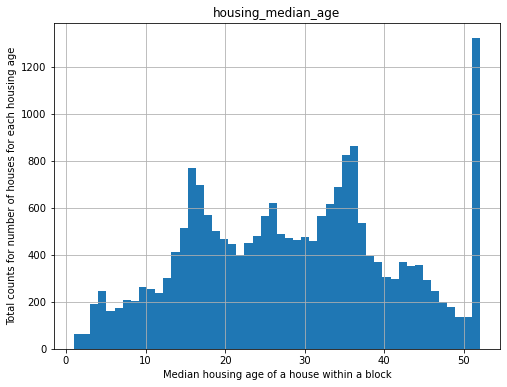

In [44]:
df1.drop(['longitude'],axis =1).drop(['latitude'],axis =1).drop(['avg_capacity'],axis =1).drop(['median_house_value'],axis =1).drop(['median_income'],axis =1).drop(['total_rooms'],axis =1).drop(['population'],axis =1).drop(['households'],axis =1).hist(bins = 50, figsize = (8,6))
plt.savefig("attribute_histogram_plots.png")
plt.xlabel('Median housing age of a house within a block')
plt.ylabel('Total counts for number of houses for each housing age')
plt.show()

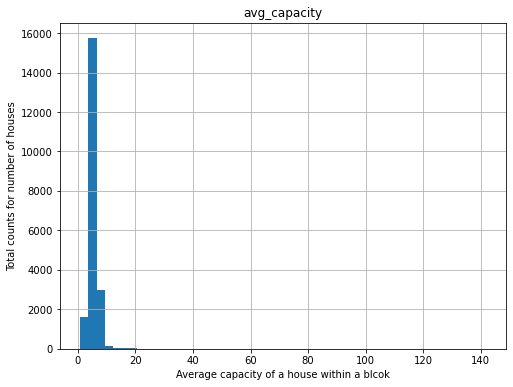

In [36]:
df1.drop(['longitude'],axis =1).drop(['latitude'],axis =1).drop(['housing_median_age'],axis =1).drop(['median_house_value'],axis =1).drop(['median_income'],axis =1).drop(['total_rooms'],axis =1).drop(['population'],axis =1).drop(['households'],axis =1).hist(bins = 50, figsize = (8,6))
plt.savefig("attribute_histogram_plots.png")
plt.xlabel('Average capacity of a house within a blcok')
plt.ylabel('Total counts for number of houses')
plt.show()

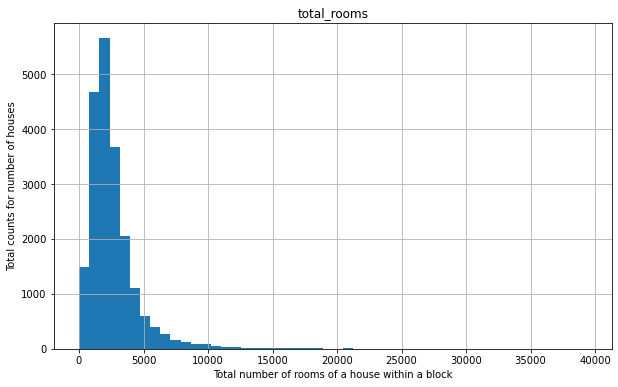

In [39]:
df1.drop(['longitude'],axis =1).drop(['latitude'],axis =1).drop(['avg_capacity'],axis =1).drop(['median_house_value'],axis =1).drop(['median_income'],axis =1).drop(['housing_median_age'],axis =1).drop(['population'],axis =1).drop(['households'],axis =1).hist(bins = 50, figsize = (10,6))
plt.savefig("attribute_histogram_plots.png")
plt.xlabel('Total number of rooms of a house within a block')
plt.ylabel('Total counts for number of houses')
plt.show()

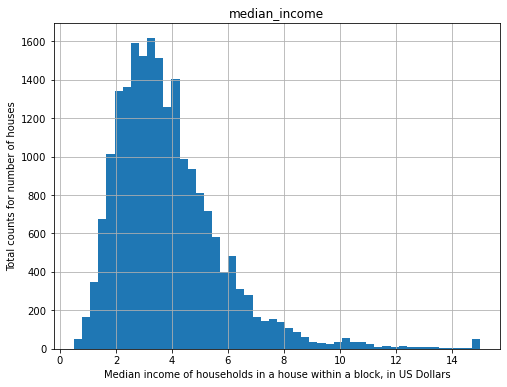

In [43]:
df1.drop(['longitude'],axis =1).drop(['latitude'],axis =1).drop(['avg_capacity'],axis =1).drop(['median_house_value'],axis =1).drop(['housing_median_age'],axis =1).drop(['total_rooms'],axis =1).drop(['population'],axis =1).drop(['households'],axis =1).hist(bins = 50, figsize = (8,6))
plt.savefig("attribute_histogram_plots.png")
plt.xlabel('Median income of households in a house within a block, in US Dollars')
plt.ylabel('Total counts for number of houses')
plt.show()

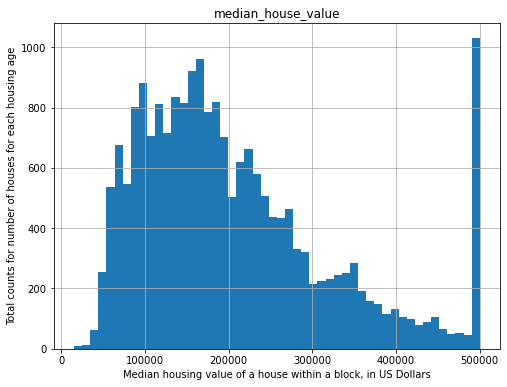

In [53]:
df1.drop(['longitude'],axis =1).drop(['latitude'],axis =1).drop(['avg_capacity'],axis =1).drop(['housing_median_age'],axis =1).drop(['median_income'],axis =1).drop(['total_rooms'],axis =1).drop(['population'],axis =1).drop(['households'],axis =1).hist(bins = 50, figsize = (8,6))
plt.savefig("attribute_histogram_plots.png")
plt.xlabel('Median housing value of a house within a block, in US Dollars')
plt.ylabel('Total counts for number of houses for each housing age')
plt.show()

The histograms above suggest the following facts:

- The distribution of housing median age was quite uniform, there were lots of houses aged above 50 years.
- The distribution of total rooms was right-skewed, most of the blocks contained around 3000 rooms.
- The distribution of median income was also right-skewed, most of the households got income around 25000 US dollars.
- The distribution of median house values was slightly right-skewed, most of the housing prices were around 100000 to 200000 US dollars, however, there were above 1000 houses worthed about 500000 US dollars.

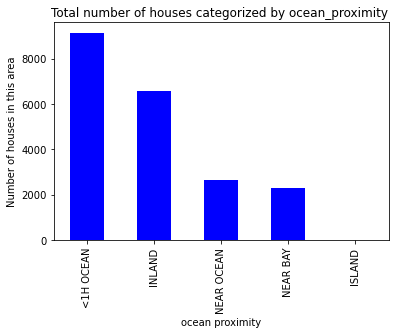

In [54]:
#Creating the histogram to show the distribution of the number of houses in each ocean_proximity category.
df1.ocean_proximity.value_counts().plot(kind = "bar",color = 'blue')
plt.title('Total number of houses categorized by ocean_proximity ')
plt.xlabel('ocean proximity')
plt.ylabel('Number of houses in this area')
plt.show()

<b>To illustrate how housing prices are different in different regions,we need to know their latitudes and longitudes.<b/>

(<span style = 'color : red'>Comment 5 and 6: Main title is missing on graph<br></span>Improvement: Added titles for all graphs.)

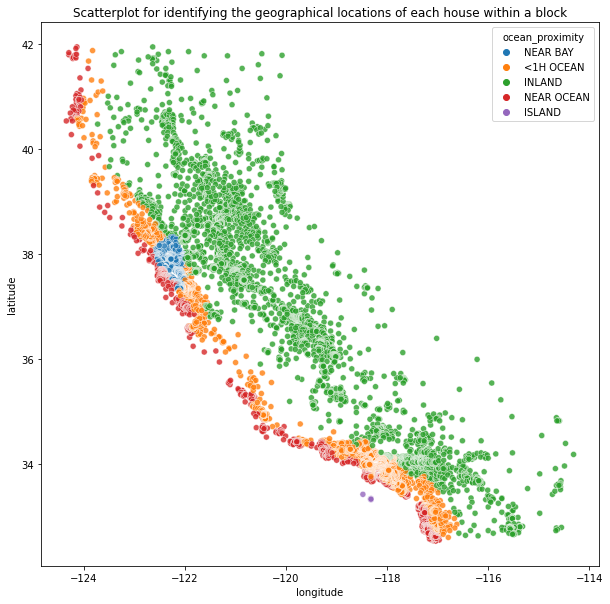

In [55]:
# Scatterplot for identifying the ocean_proximity in terms of
#geographical locations.
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'longitude', y = 'latitude', hue = 'ocean_proximity', data = df1, alpha = 0.8)
plt.title("Scatterplot for identifying the geographical locations of each house within a block")
plt.show()

It is obvious that blocks near the ocean are situated at relatively low latitudes and low longitudes, and blocks near bay are located at about 38 latitudes and -122 longitudes.

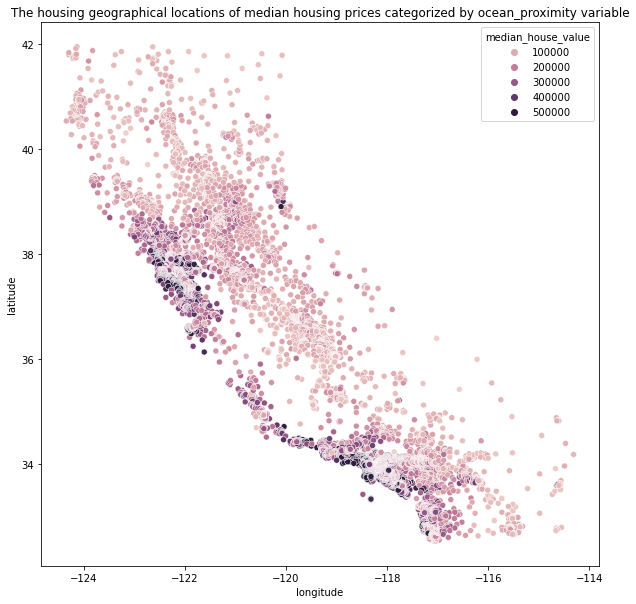

In [56]:
#Scatterplot for showing distribution of median housing prices
#categorized by ocean_proximity variable.
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'longitude', y = 'latitude', hue = 'median_house_value', data = df1)
plt.title("The housing geographical locations of median housing prices categorized by ocean_proximity variable")
plt.show()

We can tell from the graph that darker colour indicates higher housing prices, and from previous graph we can know that these colored areas indicate more closer to the ocean. 

Therefore, housing prices were relatively high near the ocean. Housing prices were even higher near bay or on island.

<b>Next, i will illustrate the relationship between housing values and median incomes of households.</b>

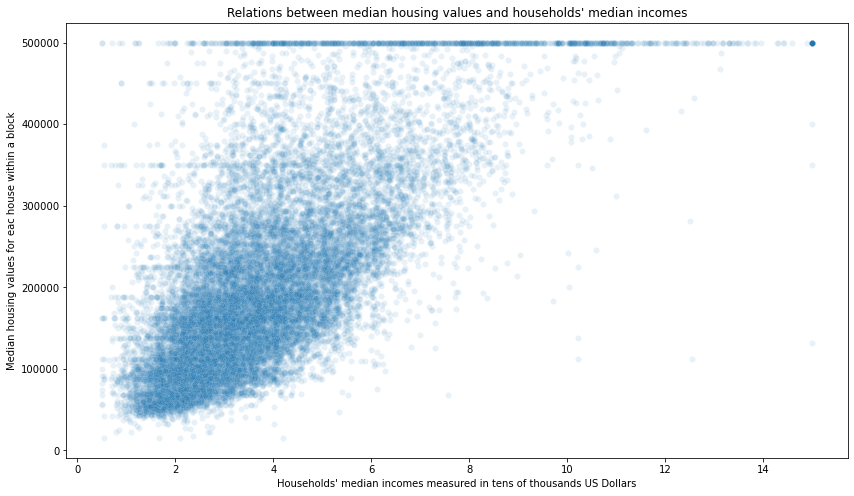

In [52]:
#ploting scatterplot to link income levels and housing values.
plt.figure(figsize = (14,8))
sns.scatterplot(x = 'median_income', y = 'median_house_value', data = df1, alpha = 0.1)
plt.title("Relations between median housing values and households' median incomes")
plt.xlabel("Households' median incomes measured in tens of thousands US Dollars")
plt.ylabel("Median housing values for eac house within a block")
plt.show()

From the scatterplot above we can see:

- Households mainly bought houses with around 50000 to 300000 US values.
- For those households who mainly bought 50000 to 300000 US dollars houses, their incomes were around 10000 to 60000 US dollars.
- Some of the households with income more than 40000 US dollars bought houses at 500000 US dollars.
- As households' incomes increase, they would buy more expensive houses, houses were <span style='color:red'>normal </span> good for those people.

(<span style = 'color : red'>Comment 7: Graph not informative<br></span>Improvement: Pooling the data into binds based on 2 year increments of median housing ages.)

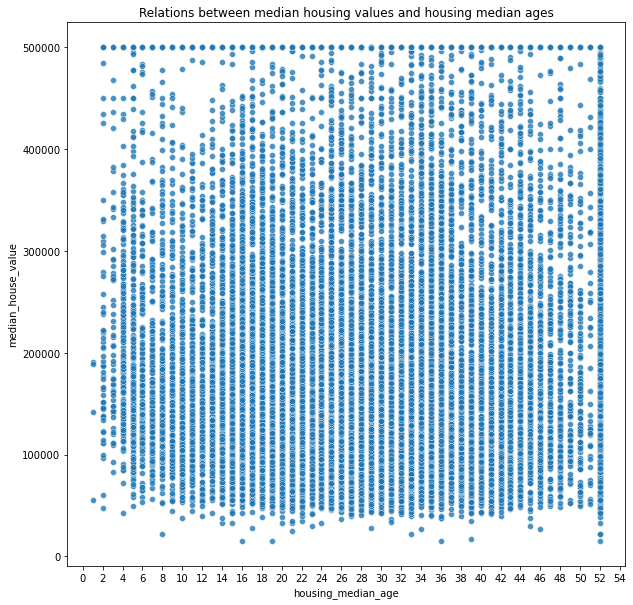

In [64]:
#ploting scatterplot to link housing ages and housing values.
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'housing_median_age', y = 'median_house_value', data = df1, alpha = 0.8)
plt.xticks(np.arange(0, 56, 2))
plt.title("Relations between median housing values and housing median ages")
plt.show()

We can clearly see that there were <span style='color:red'>no </span> big differences in housing prices categorized by median housing ages, which means housing prices would not increase even if the buildings were newly constructed. 

<span style='color:blue'>Economic intuitions: </span> It is related with households' preferences, some people prefered newly constructed houses, while the others thought aged buildings were more reliable and safe.

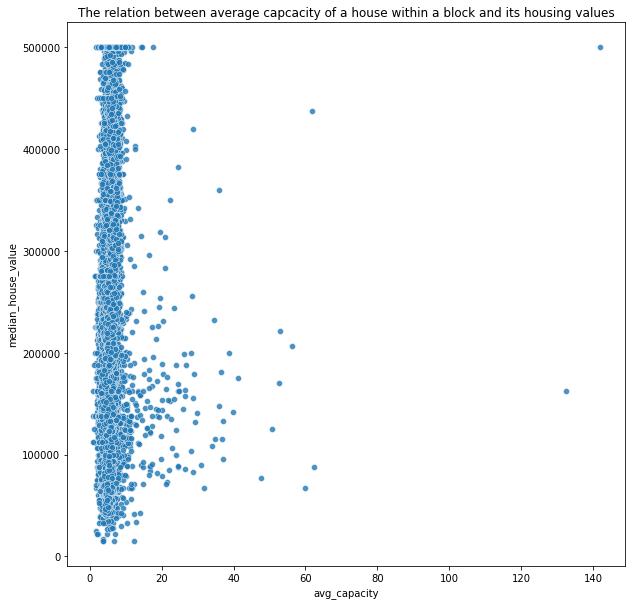

In [65]:
#ploting scatterplot to link average capacity and housing values.
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'avg_capacity', y = 'median_house_value', data = df1, alpha = 0.8)
plt.title("The relation between average capcacity of a house within a block and its housing values")
plt.show()

- The average of the housing capacity was around 5, which means there were 5 rooms for each household in the block.
- However, the housing prices varied at capacity of 5, which means more rooms per household did not indicate higher housing prices.

# Conclusion

### In this report, i mainly explained the relationship between housing features, incomes of households and housing values.

##### More specifically, i divided houseing features into: <span style='color:blue'>Housing ages, Housing capacity and Location away from the ocean </span>, where i define housing capacity as how many rooms were there per house within a block.

Findings for links between housing features and housing prices:

- <span style='color:blue'> Housing prices were the highest on island, and lowest on inland. Starting from inland areas, it got more expensive when near the ocean.</span>
- Although the housing capacity got lower when it got closer to the ocean, the values of the houses were expensive, 12.88% of households decided to live near the ocean.
- Almost half of the households in California lived 1 hour less than the ocean. For households who lived there, their average incomes were the highest compared with other regions(island, inland), and they spent the second lowest money on purchasing the houses.

- <span style='color:blue'> Other housing features: housing ages, housing capacity, did not have large influences on housing prices</span>
- Housing prices varied when average capacity and housing ages varied.

Findings for link between households' incomes and housing prices:

- With more incomes, households were willing to spend more money on purchasing more expensive houses.
- Most of the households bought houses at around 100000 to 300000 US dollars.
- Houses were normal goods.

### To conclude, this report provided discoveries about housing features, income levels and housing prices in California in 1990, although the data was long ago from us, the findings in this report provide information for expecting housing values nowadays.

---

# Project Two